# Assignment: Ionosphere Data Problem

### Dataset Description: 

This radar data was collected by a system in Goose Bay, Labrador. This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts. See the paper for more details. The targets were free electrons in the ionosphere. "Good" radar returns are those showing evidence of some type of structure in the ionosphere. "Bad" returns are those that do not; their signals pass through the ionosphere.

Received signals were processed using an autocorrelation function whose arguments are the time of a pulse and the pulse number. There were 17 pulse numbers for the Goose Bay system. Instances in this databse are described by 2 attributes per pulse number, corresponding to the complex values returned by the function resulting from the complex electromagnetic signal.

### Attribute Information:

- All 34 are continuous
- The 35th attribute is either "good" or "bad" according to the definition summarized above. This is a binary classification task.

 <br><br>

<table border="1"  cellpadding="6">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">351</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Integer,Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">34</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">N/A</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Classification</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">N/A</p></td>
	</tr>
    </tbody>
    </table>

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature ) or any usless column.
- Shuffle the data if needed.
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 60 and 40 ratio.
- Encode labels.
- Model : 1 hidden layers including 16 unit.
- Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)
- Train the Model with Epochs (100).
- If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .
- Prediction should be > **92%**
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/ionosphere_data.csv)

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kamrannaseer","key":"86bfee909777b6a9a32c48d76ca589d5"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d codeaesthete/ionosphere-data

  0% 0.00/27.9k [00:00<?, ?B/s]
100% 27.9k/27.9k [00:00<00:00, 45.3MB/s]


In [7]:
!mkdir ionosphere-data

In [8]:
! unzip ionosphere-data.zip -d crediionosphere-datatcardfraud

Archive:  ionosphere-data.zip
  inflating: crediionosphere-datatcardfraud/ionosphere_data.csv  


In [9]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import LabelEncoder
import scipy
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from keras.wrappers.scikit_learn import KerasRegressor

In [80]:
data = pd.read_csv("/content/crediionosphere-datatcardfraud/ionosphere_data.csv")
data.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [11]:
data.shape

(351, 35)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   351 non-null    int64  
 1   feature2   351 non-null    int64  
 2   feature3   351 non-null    float64
 3   feature4   351 non-null    float64
 4   feature5   351 non-null    float64
 5   feature6   351 non-null    float64
 6   feature7   351 non-null    float64
 7   feature8   351 non-null    float64
 8   feature9   351 non-null    float64
 9   feature10  351 non-null    float64
 10  feature11  351 non-null    float64
 11  feature12  351 non-null    float64
 12  feature13  351 non-null    float64
 13  feature14  351 non-null    float64
 14  feature15  351 non-null    float64
 15  feature16  351 non-null    float64
 16  feature17  351 non-null    float64
 17  feature18  351 non-null    float64
 18  feature19  351 non-null    float64
 19  feature20  351 non-null    float64
 20  feature21 

In [81]:
lb_make = LabelEncoder()

In [82]:
cate_df_object = data.select_dtypes(include=['object']).copy()
for i in cate_df_object:
  cate_df_object[i] = lb_make.fit_transform(cate_df_object[i])
cate_df_object.head()

,label
0,1
1,0
2,1
3,0
4,1


In [83]:
cate_df_int = data.select_dtypes(include=['int64']).copy()
# for i in cate_df_int:
#   cate_df_int[i]=(cate_df_int[i]-cate_df_int[i].min())/(cate_df_int[i].max()-cate_df_int[i].min())
cate_df_int.head()

,feature1,feature2
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [84]:
cate_df_float = data.select_dtypes(include=['float64']).copy()
for i in cate_df_float:
  cate_df_float[i]=(cate_df_float[i]-cate_df_float[i].min())/(cate_df_float[i].max()-cate_df_float[i].min())
cate_df_float.head()

,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
0,0.997695,0.470555,0.926215,0.511530,0.91699,0.311460,1.000000,0.518800,0.926215,0.411225,0.798775,0.275275,0.802680,0.308885,0.921780,0.307290,0.791060,0.339040,0.784855,0.351630,0.684730,0.263215,0.784055,0.244145,0.705390,0.269160,0.606330,0.329550,0.711335,0.227565,0.593205,0.273500
1,1.000000,0.405855,0.965175,0.319220,0.44566,0.032015,1.000000,0.477255,0.754370,0.161285,0.672160,0.151465,0.241575,0.012425,0.527495,0.188815,0.665545,0.000000,0.434245,0.273500,0.409720,0.321330,0.398340,0.367155,0.397660,0.407995,0.404800,0.442035,0.416870,0.468560,0.431310,0.487765
2,1.000000,0.483175,1.000000,0.502425,1.00000,0.439690,0.944825,0.505990,0.865410,0.526730,0.927215,0.504135,0.772955,0.501495,0.918875,0.431780,0.877675,0.457300,0.854435,0.362490,0.716925,0.439690,0.787640,0.298900,0.794920,0.389275,0.715500,0.413175,0.802180,0.379100,0.780225,0.308810
3,1.000000,0.274195,1.000000,1.000000,0.85608,0.000000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000,0.572580,0.770470,0.303350,0.000000,0.227665,0.150125,1.000000,0.500000,0.500000,1.000000,0.953475,0.758065,1.000000,1.000000,0.399505,0.628410,1.000000,0.338090,1.000000
4,1.000000,0.487995,0.970700,0.532655,0.96053,0.383725,0.885760,0.418005,0.763990,0.398625,0.782045,0.496440,0.671975,0.362715,0.764700,0.391100,0.725535,0.410935,0.529910,0.322125,0.511545,0.235605,0.516430,0.174210,0.566450,0.233970,0.512155,0.189015,0.471465,0.202135,0.476960,0.171515


In [85]:
data = cate_df_object.join(cate_df_int)
data = data.join(cate_df_float)
data.head()

,label,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
0,1,1,0,0.997695,0.470555,0.926215,0.511530,0.91699,0.311460,1.000000,0.518800,0.926215,0.411225,0.798775,0.275275,0.802680,0.308885,0.921780,0.307290,0.791060,0.339040,0.784855,0.351630,0.684730,0.263215,0.784055,0.244145,0.705390,0.269160,0.606330,0.329550,0.711335,0.227565,0.593205,0.273500
1,0,1,0,1.000000,0.405855,0.965175,0.319220,0.44566,0.032015,1.000000,0.477255,0.754370,0.161285,0.672160,0.151465,0.241575,0.012425,0.527495,0.188815,0.665545,0.000000,0.434245,0.273500,0.409720,0.321330,0.398340,0.367155,0.397660,0.407995,0.404800,0.442035,0.416870,0.468560,0.431310,0.487765
2,1,1,0,1.000000,0.483175,1.000000,0.502425,1.00000,0.439690,0.944825,0.505990,0.865410,0.526730,0.927215,0.504135,0.772955,0.501495,0.918875,0.431780,0.877675,0.457300,0.854435,0.362490,0.716925,0.439690,0.787640,0.298900,0.794920,0.389275,0.715500,0.413175,0.802180,0.379100,0.780225,0.308810
3,0,1,0,1.000000,0.274195,1.000000,1.000000,0.85608,0.000000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000,0.572580,0.770470,0.303350,0.000000,0.227665,0.150125,1.000000,0.500000,0.500000,1.000000,0.953475,0.758065,1.000000,1.000000,0.399505,0.628410,1.000000,0.338090,1.000000
4,1,1,0,1.000000,0.487995,0.970700,0.532655,0.96053,0.383725,0.885760,0.418005,0.763990,0.398625,0.782045,0.496440,0.671975,0.362715,0.764700,0.391100,0.725535,0.410935,0.529910,0.322125,0.511545,0.235605,0.516430,0.174210,0.566450,0.233970,0.512155,0.189015,0.471465,0.202135,0.476960,0.171515


In [14]:
data.columns

Index(['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6',
       'feature7', 'feature8', 'feature9', 'feature10', 'feature11',
       'feature12', 'feature13', 'feature14', 'feature15', 'feature16',
       'feature17', 'feature18', 'feature19', 'feature20', 'feature21',
       'feature22', 'feature23', 'feature24', 'feature25', 'feature26',
       'feature27', 'feature28', 'feature29', 'feature30', 'feature31',
       'feature32', 'feature33', 'feature34', 'label'],
      dtype='object')

In [15]:
data.isnull().sum()

feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature34    0
label        0
dtype: int64

In [86]:
dependent_vars = data["label"]

In [23]:
dependent_vars

0      1
1      0
2      1
3      0
4      1
      ..
346    1
347    1
348    1
349    1
350    1
Name: label, Length: 351, dtype: int64

In [87]:
independent_vars = data.drop("label",axis=1)

In [25]:
independent_vars

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
0,1,0,0.997695,0.470555,0.926215,0.511530,0.916990,0.311460,1.000000,0.518800,0.926215,0.411225,0.798775,0.275275,0.802680,0.308885,0.921780,0.307290,0.791060,0.339040,0.784855,0.351630,0.684730,0.263215,0.784055,0.244145,0.705390,0.269160,0.606330,0.329550,0.711335,0.227565,0.593205,0.273500
1,1,0,1.000000,0.405855,0.965175,0.319220,0.445660,0.032015,1.000000,0.477255,0.754370,0.161285,0.672160,0.151465,0.241575,0.012425,0.527495,0.188815,0.665545,0.000000,0.434245,0.273500,0.409720,0.321330,0.398340,0.367155,0.397660,0.407995,0.404800,0.442035,0.416870,0.468560,0.431310,0.487765
2,1,0,1.000000,0.483175,1.000000,0.502425,1.000000,0.439690,0.944825,0.505990,0.865410,0.526730,0.927215,0.504135,0.772955,0.501495,0.918875,0.431780,0.877675,0.457300,0.854435,0.362490,0.716925,0.439690,0.787640,0.298900,0.794920,0.389275,0.715500,0.413175,0.802180,0.379100,0.780225,0.308810
3,1,0,1.000000,0.274195,1.000000,1.000000,0.856080,0.000000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000,0.572580,0.770470,0.303350,0.000000,0.227665,0.150125,1.000000,0.500000,0.500000,1.000000,0.953475,0.758065,1.000000,1.000000,0.399505,0.628410,1.000000,0.338090,1.000000
4,1,0,1.000000,0.487995,0.970700,0.532655,0.960530,0.383725,0.885760,0.418005,0.763990,0.398625,0.782045,0.496440,0.671975,0.362715,0.764700,0.391100,0.725535,0.410935,0.529910,0.322125,0.511545,0.235605,0.516430,0.174210,0.566450,0.233970,0.512155,0.189015,0.471465,0.202135,0.476960,0.171515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.917540,0.541490,0.868695,0.426470,0.921745,0.472165,0.952205,0.476890,0.946955,0.565650,0.905985,0.533615,0.896535,0.455355,1.000000,0.489495,0.983195,0.533090,0.938025,0.505775,0.887605,0.533090,0.976890,0.478990,0.917395,0.500615,1.000000,0.564075,0.933300,0.446430,0.952730,0.478465
347,1,0,0.975565,0.502095,0.975915,0.486385,0.967190,0.490400,0.972950,0.508030,0.982550,0.516405,0.970855,0.536650,0.973125,0.493370,0.985865,0.500700,0.974170,0.530190,0.963350,0.542060,0.965620,0.550435,0.972600,0.506805,0.967610,0.524625,0.965795,0.540840,0.970330,0.499825,0.957415,0.523560
348,1,0,0.973505,0.499830,0.966035,0.483865,0.975885,0.482845,0.977920,0.512230,0.970620,0.508830,0.962975,0.523440,0.969770,0.492695,0.974185,0.510020,0.968920,0.506965,0.957030,0.538385,0.947350,0.530740,0.969940,0.515965,0.962445,0.512710,0.960600,0.511210,0.962295,0.502210,0.963485,0.497115
349,1,0,0.953040,0.491715,0.990610,0.490055,0.978455,0.481770,0.928730,0.500550,0.948620,0.483425,0.945305,0.492820,0.953040,0.477350,0.956905,0.495580,0.903865,0.435360,0.943645,0.506075,0.960775,0.488400,0.955250,0.489505,0.945735,0.461200,0.914915,0.413810,0.980110,0.481215,0.937015,0.418785


In [118]:
X_train, X_test, y_train, y_test = train_test_split(independent_vars, dependent_vars, test_size=0.50)
X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.40)

In [119]:
# model = Sequential()
# model.add(Dense(70, activation='relu', input_dim=independent_vars.shape[1]))
# model.add(Dense(40, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(15, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(8, activation='relu'))
# model.add(Dense(1,activation='sigmoid'))
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])
model = Sequential()
model.add(Dense(50, activation='relu', input_dim=independent_vars.shape[1]))
model.add(Dense(35, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])

In [120]:
history = model.fit(X_train, y_train, epochs=200, verbose=1, batch_size=512, validation_data=(X_validation, y_validation))

Epoch 1/200
1/1 [==============================] - 1s 778ms/step - loss: 0.7254 - accuracy: 0.4857 - val_loss: 0.7215 - val_accuracy: 0.3099
Epoch 2/200
1/1 [==============================] - 0s 36ms/step - loss: 0.7681 - accuracy: 0.4171 - val_loss: 0.7107 - val_accuracy: 0.2958
Epoch 3/200
1/1 [==============================] - 0s 32ms/step - loss: 0.7467 - accuracy: 0.4457 - val_loss: 0.7034 - val_accuracy: 0.2958
Epoch 4/200
1/1 [==============================] - 0s 35ms/step - loss: 0.7213 - accuracy: 0.4686 - val_loss: 0.6990 - val_accuracy: 0.2676
Epoch 5/200
1/1 [==============================] - 0s 35ms/step - loss: 0.7280 - accuracy: 0.4743 - val_loss: 0.6981 - val_accuracy: 0.2394
Epoch 6/200
1/1 [==============================] - 0s 37ms/step - loss: 0.7206 - accuracy: 0.4514 - val_loss: 0.6972 - val_accuracy: 0.2113
Epoch 7/200
1/1 [==============================] - 0s 34ms/step - loss: 0.7234 - accuracy: 0.4286 - val_loss: 0.6954 - val_accuracy: 0.3239
Epoch 8/200
1/1 [==

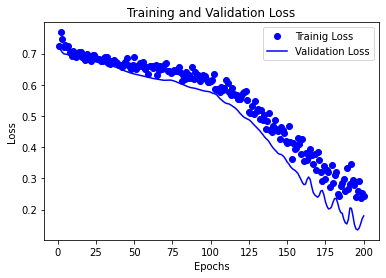

In [121]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, "bo", label="Trainig Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.legend(loc='best')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

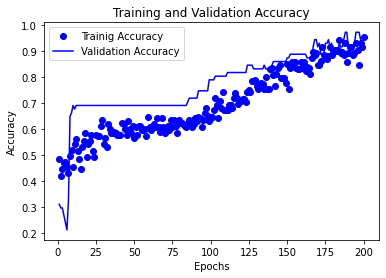

In [122]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
epochs = range(1, len(accuracy)+1)

plt.plot(epochs, accuracy, "bo", label="Trainig Accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation Accuracy")
plt.legend(loc='best')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [125]:
# predict_class = np.argmax(model.predict(X_test), axis=-1)
# accuracy = accuracy_score(y_test, predict_class)
# print(accuracy)

In [124]:
res = model.evaluate(X_test, y_test)
print(res)   
print(model.metrics_names)

4/4 [==============================] - 0s 2ms/step - loss: 0.2070 - accuracy: 0.9429
[0.2069825381040573, 0.9428571462631226]
['loss', 'accuracy']
